In [1]:
#starting new series of implementation on kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
import os
print(os.listdir("D:/projects/nlp/word2vec/dataset"))

['sign-language-digits-dataset.zip', 'X.npy', 'Y.npy']


(-0.5, 63.5, 63.5, -0.5)

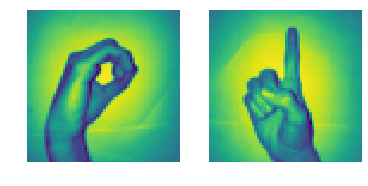

In [2]:
# load the dataset
x_l = np.load('./dataset/X.npy')
y_l = np.load('./dataset/Y.npy')

img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [3]:
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis = 0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis = 0).reshape(X.shape[0],1)
print("X shape ", X.shape)
print("Y shape", Y.shape)

X shape  (410, 64, 64)
Y shape (410, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [5]:
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])

print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)


X train flatten (348, 4096)
X test flatten (62, 4096)


In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T 

print("X train:", x_train.shape)
print("X test:", x_test.shape)
print("Y train:", y_train.shape)
print("Y test:",y_test.shape )

X train: (4096, 348)
X test: (4096, 62)
Y train: (1, 348)
Y test: (1, 62)


In [7]:
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)


def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b


In [8]:
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [9]:
y_head = sigmoid(0)
y_head

0.5

##### loss function:
f = -(1-y)log(1-y')-ylogy'
where 
    y : predicted value/label
    y' : actual value/label
incorrect => high loss
#### cost function
cost_func = sum(f)

In [10]:
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1] #cost per pixel
    
    
    #backward propagation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T)))/ x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias":derivative_bias}
    return cost,gradients

In [11]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterations time
    for i in range(number_of_iteration):
        # make the forward and backward propagation to find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        #print(cost)
        cost_list.append(cost)
        
        #lets update(learn)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        
        if i % 10 == 0 :
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
        #we update(learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation= "vertical")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
        

In [12]:
# Prediction
def predict(w, b, x_test):
    # x_test is input for forward_propagation
    z = sigmoid(np.dot(w.T, x_test) + b)
    #print(z.shape)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    # if z > 0.5, sign one
    # if z <= 0.5, sign zero
    
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    return Y_prediction

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


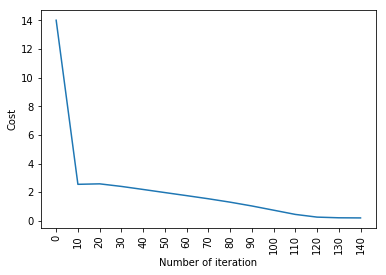

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [13]:
# putting it all together

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initiallize
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)
    
    #print train/test errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test))* 100))
    
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations = 150)

In [14]:
# Logistic regression from sklearn
from sklearn import linear_model
logrel = linear_model.LogisticRegression(random_state=42, max_iter=150)
print("test accuracy : {} ".format(logrel.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logrel.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy : 0.967741935483871 
train accuracy: 1.0 


### Using artificial neural network(ANN)

In [16]:
def intialize_paramters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1":np.random.randn(3, x_train.shape[0]) * 0.1, "bias1": np.zeros((3,1)),  "weight2": np.random.randn(y_train.shape[0], 3), "bias2": np.zeros((y_train.shape[0], 1))}
    return parameters

In [17]:
def forward_propagation_NN(x_train, parameters):
    z1 = np.dot(parameters["Weight1"], x_train) +  parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2 ,"A2" : A2}
    return A2, cache

In [19]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [ ]:
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T)/ X.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims=True)/ X.shape[1]
    
    